In [220]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')

In [221]:
data = pd.read_csv('input/train.csv')
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [223]:
columns = data.drop(['Id', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

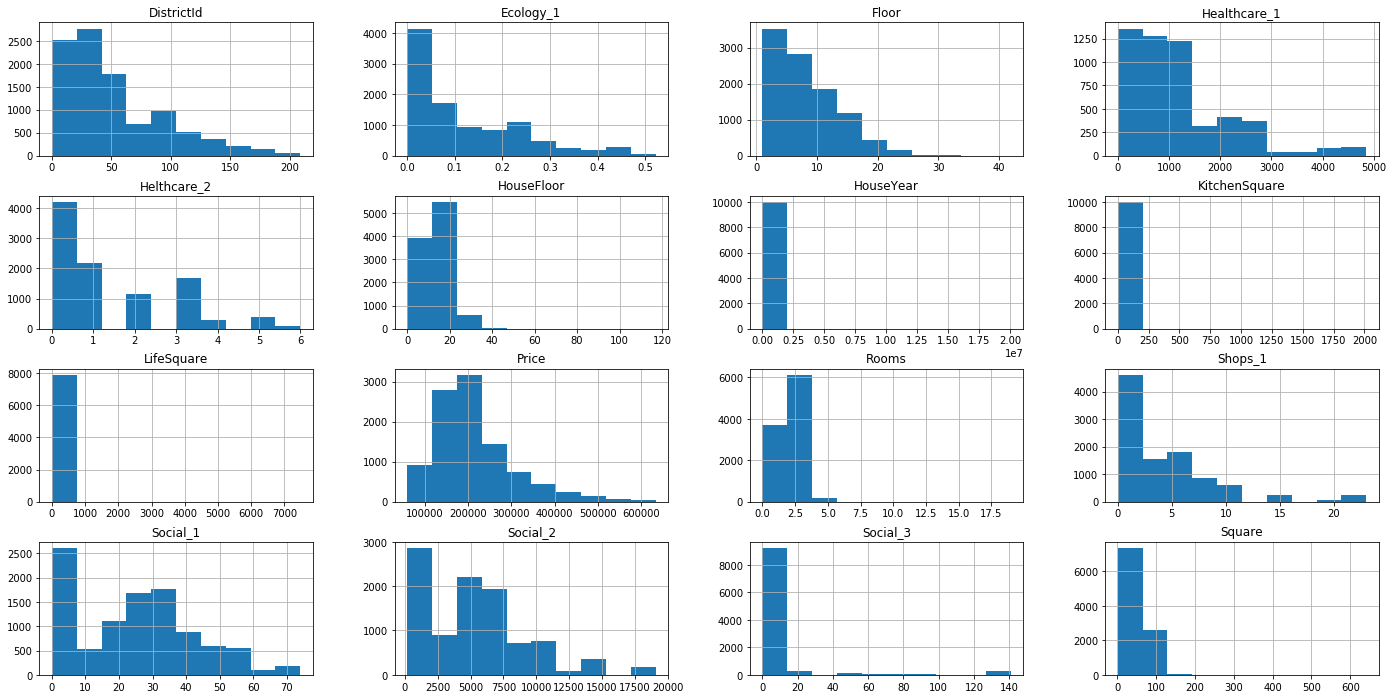

In [224]:
columns.hist(figsize=(24,12));

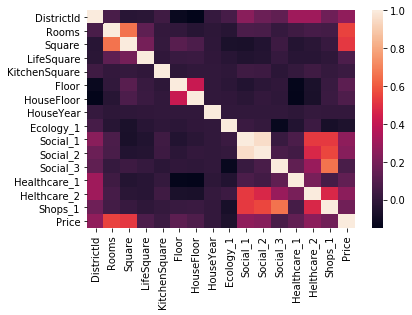

In [225]:
sns.heatmap(columns.corr(),);

### Prepare data

In [226]:
data.loc[data['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [227]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2
data.loc[data['Id'] == 8491, 'Rooms'] = 1

### train_test_split 

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [230]:
train.shape, valid.shape

((7000, 20), (3000, 20))

### Prepare train, valid

In [231]:
sqr_mean = train.groupby(['Rooms'], as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_square'})
distr_id = train['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 
                                                                               'DistrictId':'flat_qty_distr'})

In [232]:
def join_feats(df, sqr_mean, distr_id, source_df, mode):
    df = pd.merge(df, distr_id, on='DistrictId', how='left')
    df = pd.merge(df, sqr_mean, on='Rooms', how='left')
    if mode == 'test':
        df['flat_qty_distr'] = df['flat_qty_distr'].fillna(distr_id['flat_qty_distr'].min())
        df['mean_square'] = df['mean_square'].fillna(source_df['mean_square'].mean())
    return df

In [233]:
def squares_clear_data(df, source_df):   
    small_square_ids = df.loc[df['Square'] < 15, 'Id'].values
    df.loc[df['Id'].isin(small_square_ids), 'Square'] = df['mean_square']
    df.loc[df['Id'].isin(small_square_ids), 'LifeSquare'] = df['mean_square']
    df.loc[df['Id'].isin(small_square_ids), 'KitchenSquare'] = 0
    small_square_ids = df.loc[df['LifeSquare'] < 5, 'Id'].values
    df.loc[df['Id'].isin(small_square_ids), 'LifeSquare'] = source_df['LifeSquare'].mean()
    large_square_ids = df.loc[df['Square'] > 150, 'Id'].values
    df.loc[df['Id'].isin(large_square_ids), 'Square'] = df['mean_square']
    df.loc[df['Id'].isin(large_square_ids), 'LifeSquare'] = df['mean_square']
    df.loc[df['Id'].isin(large_square_ids), 'KitchenSquare'] = 0
    large_square_ids = df.loc[df['LifeSquare'] > 140, 'Id'].values
    df.loc[df['Id'].isin(large_square_ids), 'LifeSquare'] = source_df['LifeSquare'].mean()
    df['LifeSquare'] = df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    df.loc[(df['KitchenSquare'] > 12), 'KitchenSquare'] = df['Square'] - df['LifeSquare']
    df.loc[(df['KitchenSquare'] < 0), 'KitchenSquare'] = source_df['KitchenSquare'].mean() 
    return df

In [234]:
def all_clear_data(df, source_df):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = source_df['HouseYear'].median()
    df.loc[df['Rooms'] > 5, 'Rooms'] = source_df['Rooms'].median()
    df['Ecology_2'] = (df['Ecology_2'] == 'B').astype(int)
    df['Ecology_3'] = (df['Ecology_3'] == 'B').astype(int)
    df['Shops_2'] = (df['Shops_2'] == 'B').astype(int)
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    df.loc[(df['HouseFloor'] > 43) | (df['HouseFloor'] == 0), 'HouseFloor'] = source_df['HouseFloor'].median()
    return df

In [235]:
def prepare_data(df, sqr_mean, distr_id, source_df, mode):
    df = join_feats(df, sqr_mean, distr_id, source_df, mode)
    df = squares_clear_data(df, source_df)
    df = all_clear_data(df, source_df)
    return df

In [236]:
train = prepare_data(train, sqr_mean, distr_id, train, mode='train')

In [237]:
valid = prepare_data(valid, sqr_mean, distr_id, train, mode='test')

### Model

In [238]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV

In [239]:
"""parameters = [{'n_estimators': [100, 200], 
               'max_features': np.arange(1, 10),
               'max_depth': np.arange(4, 15), 'min_samples_leaf': np.arange(1,4)}]
model = GridSearchCV(estimator=RF(random_state=42), 
                     param_grid=parameters,
                     scoring='r2',
                     cv=3)"""
model = RF(n_estimators=200, max_depth=14, min_samples_leaf=2, max_features=3, random_state=42)

In [240]:
feats = ['flat_qty_distr', 'Square', 'Rooms', 'KitchenSquare', 'Social_1', 'Social_3', 'Ecology_1', 'HouseYear',  'HouseFloor', 'Healthcare_1', 'Helthcare_2', 'Ecology_2', 'Ecology_3']

In [241]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [242]:
#model.best_params_
importances = model.feature_importances_
importances

array([0.12883951, 0.3104385 , 0.15813448, 0.06387405, 0.07766881,
       0.06779054, 0.04516001, 0.05277572, 0.03567352, 0.02793864,
       0.02992754, 0.00043013, 0.00134857])

In [243]:
pd.DataFrame({'importances': importances * 100, 'feature_names': feats},
                       columns = ['importances', 'feature_names']).sort_values('importances', ascending=False)

,importances,feature_names
1,31.043850,Square
2,15.813448,Rooms
0,12.883951,flat_qty_distr
4,7.766881,Social_1
5,6.779054,Social_3
3,6.387405,KitchenSquare
7,5.277572,HouseYear
6,4.516001,Ecology_1
8,3.567352,HouseFloor
10,2.992754,Helthcare_2


In [244]:
pred_train = model.predict(train.loc[:, feats])

In [245]:
pred_valid = model.predict(valid.loc[:, feats])

In [246]:
pred_train.shape, pred_valid.shape

((7000,), (3000,))

### Evaluation

In [247]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [248]:
r2(train['Price'], pred_train), mse(train['Price'], pred_train)

(0.8850156773214845, 992749880.8427745)

In [249]:
r2(valid['Price'], pred_valid), mse(valid['Price'], pred_valid)

(0.7390045152540206, 2245019216.011255)

### Test

In [250]:
test = pd.read_csv('input/test.csv')

In [251]:
test.shape

(5000, 19)

In [252]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [253]:
test = prepare_data(test, sqr_mean, distr_id, train, mode='test')
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,flat_qty_distr,mean_square
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.905400,56.356795,36.811687,6.154297,8.632000,12.930400,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.917600,0.023402,56.632991
std,4832.674037,44.179466,0.806834,18.285404,14.586357,6.013543,5.483228,6.295354,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001,0.026187,14.482243
min,1.000000,0.000000,0.000000,16.319015,5.042692,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000143,41.366595
25%,4221.750000,21.000000,1.000000,41.906231,27.673076,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.005286,41.366595
50%,8320.500000,37.000000,2.000000,52.921340,36.843731,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,1.000000,0.009429,56.810018
75%,12598.250000,77.000000,2.000000,66.269760,41.760597,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,0.050714,56.810018
max,16795.000000,212.000000,5.000000,148.783492,136.921090,102.257792,78.000000,40.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,0.082000,103.645574


In [254]:
test['Price'] = model.predict(test.loc[:, feats])

In [255]:
test['Price'].describe()

count      5000.000000
mean     215590.033953
std       76137.793920
min       70689.301748
25%      167008.458841
50%      196487.679196
75%      246950.622777
max      545147.508394
Name: Price, dtype: float64

In [256]:
test.loc[:, ['Id', 'Price']].to_csv('FGlushkov_predictions.csv', index=None)